# Assignment: выбор числа соседей

In [23]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd
headers = ['target', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
           'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
           'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_data = pd.read_csv('wine.data', names=headers, header=None)
n = len(df_data.index)
df_target = df_data['target']
df_data = df_data[df_data.columns[1:]]

Populating the interactive namespace from numpy and matplotlib


Оценку качества необходимо провести методом кросс-валидации по 5 блокам (5-fold). Создайте генератор разбиений, который перемешивает выборку перед формированием блоков (shuffle=True). Для воспроизводимости результата, создавайте генератор KFold с фиксированным параметром random_state=42. В качестве меры качества используйте долю верных ответов (accuracy).

Найдите точность классификации на кросс-валидации для метода k ближайших соседей (sklearn.neighbors.KNeighborsClassifier), при k от 1 до 50. При каком k получилось оптимальное качество? Чему оно равно (число в интервале от 0 до 1)? Данные результаты и будут ответами на вопросы 1 и 2.

In [24]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold

def optimal_number_of_neighbours(data, target):
    kf = KFold(n, n_folds=5, shuffle=True, random_state=42)
    k_values = range(1, 51)
    accuracies = []
    for k in k_values:
        neigh = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(neigh, data, target, cv=kf)
        accuracies.append(scores.mean())
    plt.plot(k_values, accuracies)
    m = max(accuracies)
    print("Max accuracy: {} on {} neighbours".format(m, accuracies.index(m) + 1))

Max accuracy: 0.730476190476 on 1 neighbours


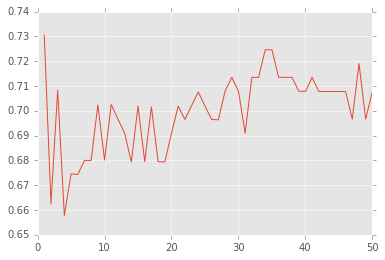

In [25]:
optimal_number_of_neighbours(df_data, df_target)

Произведите масштабирование признаков с помощью функции sklearn.preprocessing.scale. Снова найдите оптимальное k на кросс-валидации.

Max accuracy: 0.977619047619 on 29 neighbours


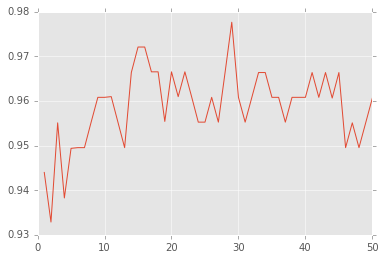

In [27]:
from sklearn.preprocessing import scale

optimal_number_of_neighbours(scale(df_data), df_target)

In [29]:
with open('2_1.txt', 'w') as f:
    f.write("1")
with open('2_2.txt', 'w') as f:
    f.write("0.73")
with open('2_3.txt', 'w') as f:
    f.write("29")
with open('2_4.txt', 'w') as f:
    f.write("0.98")

# Assignment: Выбор метрики

Загрузите выборку Boston с помощью функции sklearn.datasets.load_boston(). Результатом вызова данной функции является объект, у которого признаки записаны в поле data, а целевой вектор — в поле target.
Приведите признаки в выборке к одному масштабу при помощи функции sklearn.preprocessing.scale.

In [38]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data = scale(boston.data)

Переберите разные варианты параметра метрики p по сетке от 1 до 10 с таким шагом, чтобы всего было протестировано 200 вариантов (используйте функцию numpy.linspace). Используйте KNeighborsRegressor с n_neighbors=5 и weights='distance' — данный параметр добавляет в алгоритм веса, зависящие от расстояния до ближайших соседей. В качестве метрики качества используйте среднеквадратичную ошибку (параметр scoring='mean_squared_error' у cross_val_score). Качество оценивайте, как и в предыдущем задании, с помощью кросс-валидации по 5 блокам с random_state = 42, не забудьте включить перемешивание выборки (shuffle=True).

Max mean squared error: -9.41745400691 with p=1.49748743719


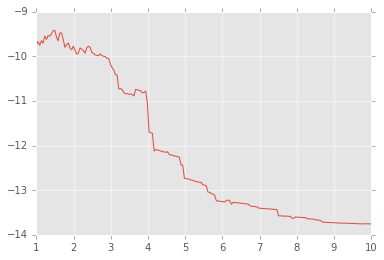

In [43]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

kf = KFold(n, n_folds=5, shuffle=True, random_state=42)
p_values = np.linspace(1, 10, num=200)
accuracies = []
for p in p_values:
    neigh = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='minkowski', p=p)
    scores = cross_val_score(neigh, boston.data, boston.target, cv=kf, scoring='mean_squared_error')
    accuracies.append(scores.mean())
plt.plot(p_values, accuracies)
m = max(accuracies)
print("Max mean squared error: {} with p={}".format(m, p_values[accuracies.index(m)]))

In [44]:
with open('2_5.txt', 'w') as f:
    f.write("1.50")